# Tutorial - Time Series Forecasting - Autoregression (AR)

The goal is to forecast time series with the Autoregression (AR) Approach. 1) JetRail Commuter, 2) Air Passengers, 3) Function Autoregression with Air Passengers, and 5) Function Autoregression with Wine Sales.

References Jason Brownlee - https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [104]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [105]:
# Load File
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
Datetime    494 non-null object
ID          494 non-null float64
Count       494 non-null float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [106]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

# Autoregression (AR) Approach with JetRail 

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

In [107]:
#Split Train Test
import math
total_size=len(df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

In [108]:
from statsmodels.tsa.ar_model import AR
model = AR(train.Count)
fit1 = model.fit()
y_hat = test.copy()
y_hat['AR'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

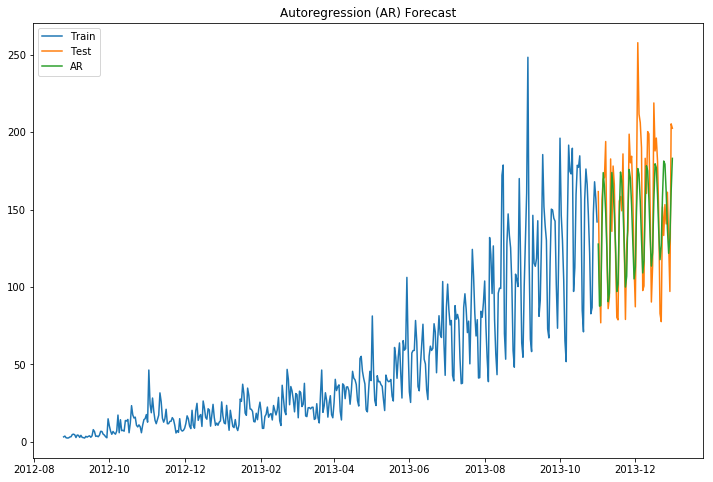

In [109]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['AR'], label='AR')
plt.legend(loc='best')
plt.title("Autoregression (AR) Forecast")
plt.show()

# RMSE Calculation

In [110]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.AR))
print('RMSE = '+str(rms))

RMSE = 28.635096626807453


# Autoregression (AR) Approach with Air Passagers 

In [111]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [112]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)
#train.info()
#test.info()

In [113]:
from statsmodels.tsa.ar_model import AR
# Create prediction table
y_hat = test.copy()
model = AR(train['Passengers'])
fit1 = model.fit()
y_hat['AR'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
y_hat.describe()

,Passengers,AR
count,44.000000,44.000000
mean,421.068182,471.280430
std,77.330279,94.100652
min,305.000000,315.305136
25%,359.750000,396.554986
50%,406.500000,456.268797
75%,465.500000,528.963391
max,622.000000,694.310902


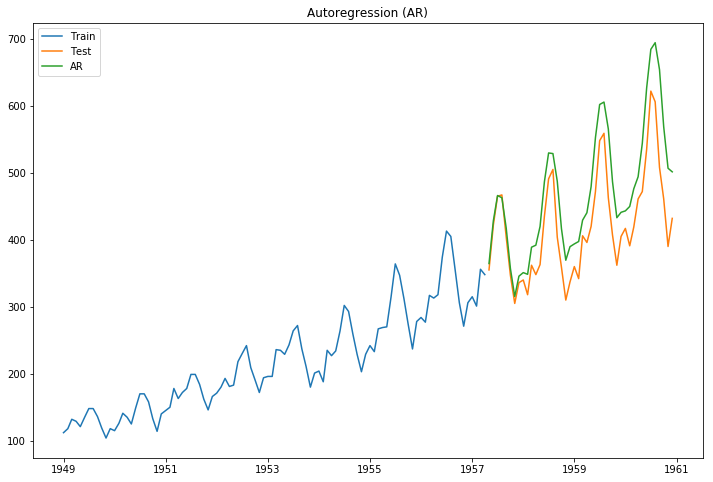

In [114]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['AR'], label='AR')
plt.legend(loc='best')
plt.title("Autoregression (AR)")
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.AR))
print('RMSE = '+str(rms))

RMSE = 60.13838110500644


# Function Autoregression (AR) Approach with variables

In [116]:
def AR_forecasting(mydf,colval,split):
    #print(split)
    import math
    from statsmodels.tsa.api import Holt
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    model = AR(train[colval])
    fit1 = model.fit()
    y_hat['AR'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['AR'], label='AR')
    plt.legend(loc='best')
    plt.title("Autoregression (AR) Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.AR))
    print('RMSE = '+str(rms))

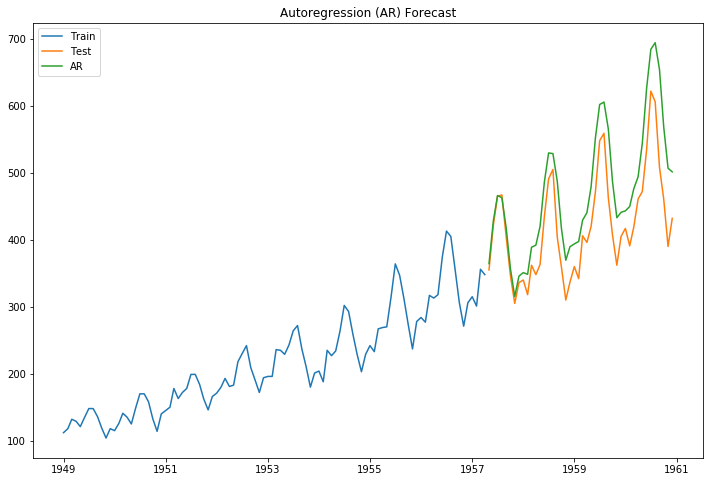

RMSE = 60.13838110500644


In [117]:
AR_forecasting(df,'Passengers',0.7)

# Testing Function Autoregression (AR) Approach with Wine Dataset 

In [118]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Date     176 non-null object
Sales    176 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


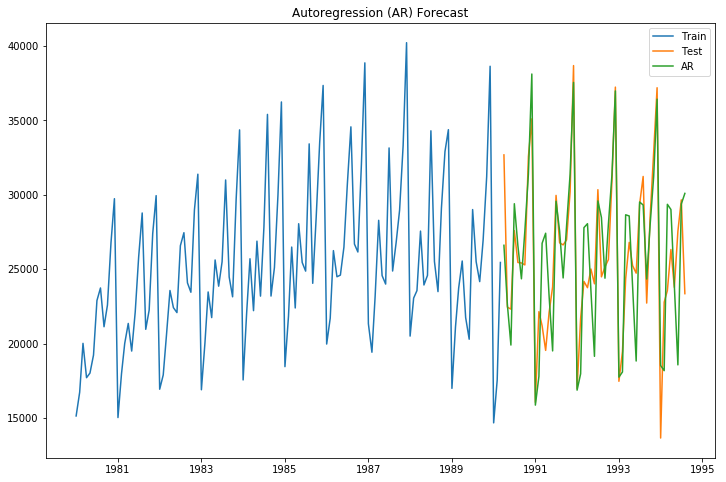

RMSE = 3312.946860196863


In [119]:
AR_forecasting(df,'Sales',0.7)